# WEB CRAWLER AND  NEARLY DUPLICATE DETECTION ALGORITHMS

## Task 1

In [1]:
pip install parsel

In [2]:
pip install tld

In [3]:
import urllib.request
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector

## a) Five Random Seed URLs

In [4]:
seed_urls = ["https://en.wikipedia.org/wiki/Link_analysis","https://www.python.org/","https://www.youtube.com/","https://wiki.python.org/moin/IntegratedDevelopmentEnvironments/","https://www.stackoverflow.com/"]

In [5]:
#with urllib.request.urlopen('https://en.wikipedia.org/wiki/Link_analysis') as response:
#    html = response.read()

In [6]:
#selector = Selector(text=html.decode("utf-8") )
#pol = selector.css('body').get()

## b) Fetch WebPages

In [9]:
urls_dict ={1:"https://en.wikipedia.org/wiki/Link_analysis",2:"https://www.python.org/",3:"https://www.youtube.com/",4:"https://wiki.python.org/moin/IntegratedDevelopmentEnvironments/",5:"https://www.stackoverflow.com/"}

In [10]:
class MyHTMLParser(HTMLParser):
    def handle_data(self, data):
        if data.strip()!="":
            print(data)
parser = MyHTMLParser()

In [526]:
def fetch_webpages(url_):
    for i,u in url_.items():
        print("Page:",i)
        print("-------")
        with urllib.request.urlopen(u) as response: 
            html = response.read()
        selector = Selector(text=html.decode("utf-8") )
        pol = selector.css('body').get()
        parser = MyHTMLParser()
        parser.feed(pol.replace("\\n",""))
        print("\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n")

#Uncommnet the lines 3 , 4 , 11 in this cell to stop printing lengthy outputs

In [12]:
fetch_webpages(urls_dict)

Page: 1
-------
Link analysis
From Wikipedia, the free encyclopedia
Jump to navigation
Jump to search
In 
network theory
, 
link analysis
 is a 
data-analysis
 technique used to evaluate relationships (connections) between nodes. Relationships may be identified among various types of nodes (objects), including 
organizations
, 
people
 and 
transactions
. Link analysis has been used for investigation of criminal activity (
fraud detection
, 
counterterrorism
, and 
intelligence
), 
computer security analysis
, 
search engine optimization
, 
market research
, 
medical research
, and art.

Contents
1
Knowledge discovery
2
History
3
Applications
4
Issues with link analysis
4.1
Information overload
4.2
Prosecution vs. crime prevention
5
Proposed solutions
5.1
CrimeNet explorer
6
References
7
External links
Knowledge discovery
[
edit
]
Knowledge discovery
 is an 
iterative
 and 
interactive
 process used to 
identify
, analyze and visualize patterns in data.
[1]
 Network analysis, link anal

## c) Graph

In [82]:
#parser.feed(pol.replace("\\n",""))

In [83]:
def getDataFromUrl(url): 
    with urllib.request.urlopen(url) as response: 
        html = response.read() 
    return html

def getSelector(html):
    selector = Selector(text=html.decode("utf-8")) 
    return selector

def getBody(selector): 
    pol = selector.css('body').get() 
    return pol

def getUrls(selector): 
    urls = selector.xpath('//a/@href').getall() 
    return urls

def processQueueElement(url): 
    parsedUrl = urlparse(url) 
    data = getDataFromUrl(url) 
    selector = getSelector(data) 
    body = getBody(selector) 
    urls = getUrls(selector) 
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedUrl.scheme+'://'+parsedUrl.netloc+i 
            #print(urls[idx]) 
    return urls

urls_frontier={}

In [86]:
def graph_creation(urls_see,count):
    j=0
    l=[]
    urls_frontier=urls_see
    urls_list={}
    for k,url in urls_frontier.items():
        j=0
        nba_dummy=processQueueElement(url)
        for i,u in enumerate(nba_dummy):
            if (i>=10 and i<20) and not u.startswith("#"):
                if(u not in urls_list.values()): 
                    urls_list[count+i-10]=u
                    l.append([k,count+i-10])
                    j+=1
                else:
                    for key,v in urls_list.items():
                        if v == u:
                            if k != key :
                                #urls_list[count+i-10]=u
                                l.append([k,key])
                                j+=1
            elif(i>=20):
                break
        count=count+j
    urls_frontier=dict(urls_list)
    for k,url in urls_frontier.items():
        j=0
        try:
            nba_dummy=processQueueElement(url)
            for i,u in enumerate(nba_dummy):
                if(i>=0 and i<10) and not u.startswith("#"): 
                    if(u not in urls_list.values()): 
                        urls_list[count+i-10]=u
                        l.append([k,count+i-10])
                        j+=1
                    else:
                        for key,v in urls_list.items():
                            if v == u:
                                #urls_list[count+i-10]=u
                                if k != key:
                                    l.append([k,key])
                                    j+=1
                elif(i>=10):
                    break
            count=count+j
        except:
            print("exception")
    return l,urls_list

In [87]:
l,urls_list=graph_creation(urls_dict,6)

exception


In [20]:
#print(urls_list)

In [94]:
#print(l)
#len(l)

In [22]:
#tuple(l[0])

In [88]:
#duplicate removeal from l
dupl=[]
for y0 in range(0,len(l)):
    dupl.append(tuple(l[y0]))   

In [191]:
#len(set(dupl))
final_l=sorted((list(set(dupl))))

In [485]:
(final_l)

[(1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 10),
 (2, 13),
 (2, 17),
 (2, 18),
 (2, 19),
 (3, 17),
 (3, 18),
 (3, 19),
 (3, 20),
 (3, 21),
 (3, 22),
 (3, 23),
 (3, 24),
 (3, 25),
 (3, 26),
 (4, 27),
 (4, 28),
 (4, 29),
 (4, 30),
 (4, 31),
 (4, 32),
 (4, 33),
 (4, 34),
 (4, 35),
 (4, 36),
 (5, 38),
 (5, 39),
 (5, 40),
 (5, 42),
 (5, 43),
 (5, 44),
 (5, 45),
 (5, 46),
 (6, 38),
 (6, 39),
 (6, 40),
 (6, 41),
 (6, 42),
 (6, 43),
 (6, 44),
 (6, 45),
 (7, 44),
 (7, 45),
 (7, 48),
 (7, 49),
 (7, 50),
 (7, 51),
 (7, 52),
 (7, 53),
 (8, 54),
 (8, 56),
 (8, 57),
 (8, 58),
 (8, 59),
 (8, 60),
 (8, 61),
 (9, 62),
 (9, 63),
 (9, 65),
 (9, 66),
 (9, 68),
 (9, 69),
 (10, 70),
 (10, 71),
 (10, 72),
 (10, 73),
 (10, 74),
 (10, 75),
 (17, 25),
 (17, 75),
 (17, 76),
 (17, 77),
 (17, 78),
 (17, 79),
 (17, 82),
 (17, 83),
 (17, 84),
 (18, 25),
 (18, 75),
 (18, 76),
 (18, 82),
 (18, 83),
 (18, 84),
 (18, 88),
 (18, 89),
 (19, 25),
 (19, 75),
 (19, 76),
 (19, 82),
 (19, 83),
 (19, 84),
 (19, 97),
 (19, 103),
 (

In [110]:
import networkx as nx
graph = nx.DiGraph()
for g in dupl:
    graph.add_edge(g[0],g[1])

In [114]:
graph.edges()

OutEdgeView([(1, 6), (1, 7), (1, 8), (1, 9), (6, 38), (6, 39), (6, 40), (6, 41), (6, 42), (6, 43), (6, 44), (6, 45), (7, 44), (7, 45), (7, 48), (7, 49), (7, 50), (7, 51), (7, 52), (7, 53), (8, 54), (8, 56), (8, 57), (8, 58), (8, 59), (8, 60), (8, 61), (9, 62), (9, 63), (9, 65), (9, 66), (9, 68), (9, 69), (2, 10), (2, 13), (2, 17), (2, 18), (2, 19), (10, 70), (10, 71), (10, 72), (10, 73), (10, 74), (10, 75), (17, 75), (17, 76), (17, 77), (17, 78), (17, 79), (17, 25), (17, 82), (17, 83), (17, 84), (18, 75), (18, 76), (18, 88), (18, 89), (18, 25), (18, 82), (18, 83), (18, 84), (19, 75), (19, 76), (19, 97), (19, 25), (19, 82), (19, 83), (19, 84), (19, 103), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (20, 75), (20, 76), (20, 25), (20, 82), (20, 83), (20, 84), (20, 103), (20, 111), (20, 17), (21, 75), (21, 76), (21, 115), (21, 116), (21, 117), (21, 118), (21, 119), (21, 120), (21, 25), (22, 75), (22, 76), (22, 126), (22, 127), (22, 128), (22, 12

In [95]:
urls_keys=[]
for k,v in urls_list.items():
    urls_keys.append(k)

In [28]:
#print(urls_keys)

## d,e,f) Mercator

In [96]:
class MyHTMLParser(HTMLParser): 
    def handle_data(self, data): 
        if data.strip()!="":
            d.append(data)
def get_document(u):
    s=""
    parser = MyHTMLParser()
    try:
        with urllib.request.urlopen(u) as response: 
            html = response.read()
        selector = Selector(text=html.decode("utf-8") )
        pol = selector.css('body').get()
        parser.feed(pol.replace("\\n",""))
        for i in d:
            s=s+i+" "
    except:
        s=""
    return s
def processQueueElement_m(url): 
    parsedUrl = urlparse(url) 
    data = getDataFromUrl(url) 
    selector = getSelector(data) 
    body = getBody(selector) 
    urls = getUrls(selector) 
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedUrl.scheme+'://'+parsedUrl.netloc+i 
            #print(urls[idx])
    return urls

In [97]:
from collections import defaultdict
from tld import get_tld
dict_backques=defaultdict(list)
dict_backques_deadline=defaultdict(int)

for k,u in urls_list.items():
    try:
        res=get_tld(u, as_object=True)
        key=res.fld
    except:
        print("",end="")
    if key not in dict_backques:
        dict_backques_deadline[key]=0
    dict_backques[key].append(u)

In [98]:
#print(dict_backques_deadline)
dict_list=list(sorted(dict_backques_deadline.items(), key = lambda kv:(kv[1], kv[0])))
#print(dict_backques['linkedin.com'])

In [108]:
def docs_collection(s,doc,start):
    try:
        u=dict_backques[s].pop(0)
        if(get_document(u)==''):
            return 0
        else:
            doc.append(get_document(u))
        urls=processQueueElement_m(u)
        for u in urls:
            try:
                res=get_tld(u, as_object=True)
                key=res.fld
                if key not in dict_backques:
                    dict_backques_deadline[key]=0
                    dict_backques[key].append(u)
                dict_backques[key].append(u)
            except:
                print("",end="")
        dict_backques_deadline[s]=(time.time()-start+2)
        return 1
    except:
        dict_backques_deadline[s]=(time.time()-start+2)
        return 0

In [109]:
import time
import heapq
start=time.time()
doc=[]
count_documents=0
url_key=1
while(count_documents<=100):
    #dict_list=list(sorted(dict_backques_deadline.items(), key = lambda kv:(kv[1], kv[0])))
    heap=[(value,key) for key,value in dict_backques_deadline.items()]
    heapq.heapify(heap)
    dict_list=[(key,value) for value,key in heap]
    #print(dict_list,time.time()-start,sep="    ")
    if(time.time()-start > dict_list[0][1]):
        d=[]
        count_documents+=docs_collection(dict_list[0][0],doc,start)
        #print(count_documents)

1
2
3
4
5
6
7
8
9
10
10
10
10
10
10
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
25
25
25
25
25
26
26
26
26
27
27
27
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
42
43
44
44
44
45
46
47
48
49
50
51
52
53
54
55
55
55
55
55
55
56
56
56
56
57
58
59
59
59
59
60
60
60
60
60
60
60
60
60
60
60
60
60
61
61
61
61
62
63
64
65
66
67
67
68
68
68
68
68
69
69
69
69
69
69
69
70
71
72
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
86
86
86
87
87
87
87
87
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
88
89
89
89
89
89
89
89
89
90
91
92
93
93
93
93
93
93
93
94
95
96
97
98
98
98
98
98
99
100
101


# TASK 2

### (a) : Jaccard Similarity and Heat MAP

In [115]:
doc_jsim=[]
for x0 in range(0,len(doc)):
    if(doc[x0]==''):
        pass
    else:
        doc_jsim.append(doc[x0])

In [118]:
len(doc_jsim)

100

In [133]:
final_set=[' ']
for x1 in range(0,len(doc_jsim)):
    final_corp =  [' ']
    f = doc_jsim[x1]
    for word in f.split():
        final_corp.append(word)
    final_corp.remove(' ')
    final_set.append(set(final_corp))
final_set.remove(' ')

In [134]:
#print(len(final_corp))
#len(final_set)
#len(docs_selected)
#(final_set)
len(final_set)
cnt=0
for tes in range(0,len(final_set)):
    if(len(final_set[tes])==0):
        cnt=cnt+1
        print(tes,cnt)

In [135]:
t={1}
for y in range(1,100):
    t=t.union(final_set[y])

In [136]:
import numpy as np
jaccard_scores = np.zeros((len(final_set),len(final_set)))

In [137]:
for x4 in range(0,len(final_set)):
    for x5 in range(0,len(final_set)):
        jaccard_scores[x4][x5] = len(final_set[x4] & final_set[x5])/len(final_set[x4] | final_set[x5])

In [138]:
jaccard_scores

array([[1.        , 0.13690896, 0.1730038 , ..., 0.02418097, 0.021     ,
        0.00782998],
       [0.13690896, 1.        , 0.12894737, ..., 0.02434783, 0.02073733,
        0.00789474],
       [0.1730038 , 0.12894737, 1.        , ..., 0.02014388, 0.01532913,
        0.00399202],
       ...,
       [0.02418097, 0.02434783, 0.02014388, ..., 1.        , 0.1221374 ,
        0.01518438],
       [0.021     , 0.02073733, 0.01532913, ..., 0.1221374 , 1.        ,
        0.03529412],
       [0.00782998, 0.00789474, 0.00399202, ..., 0.01518438, 0.03529412,
        1.        ]])

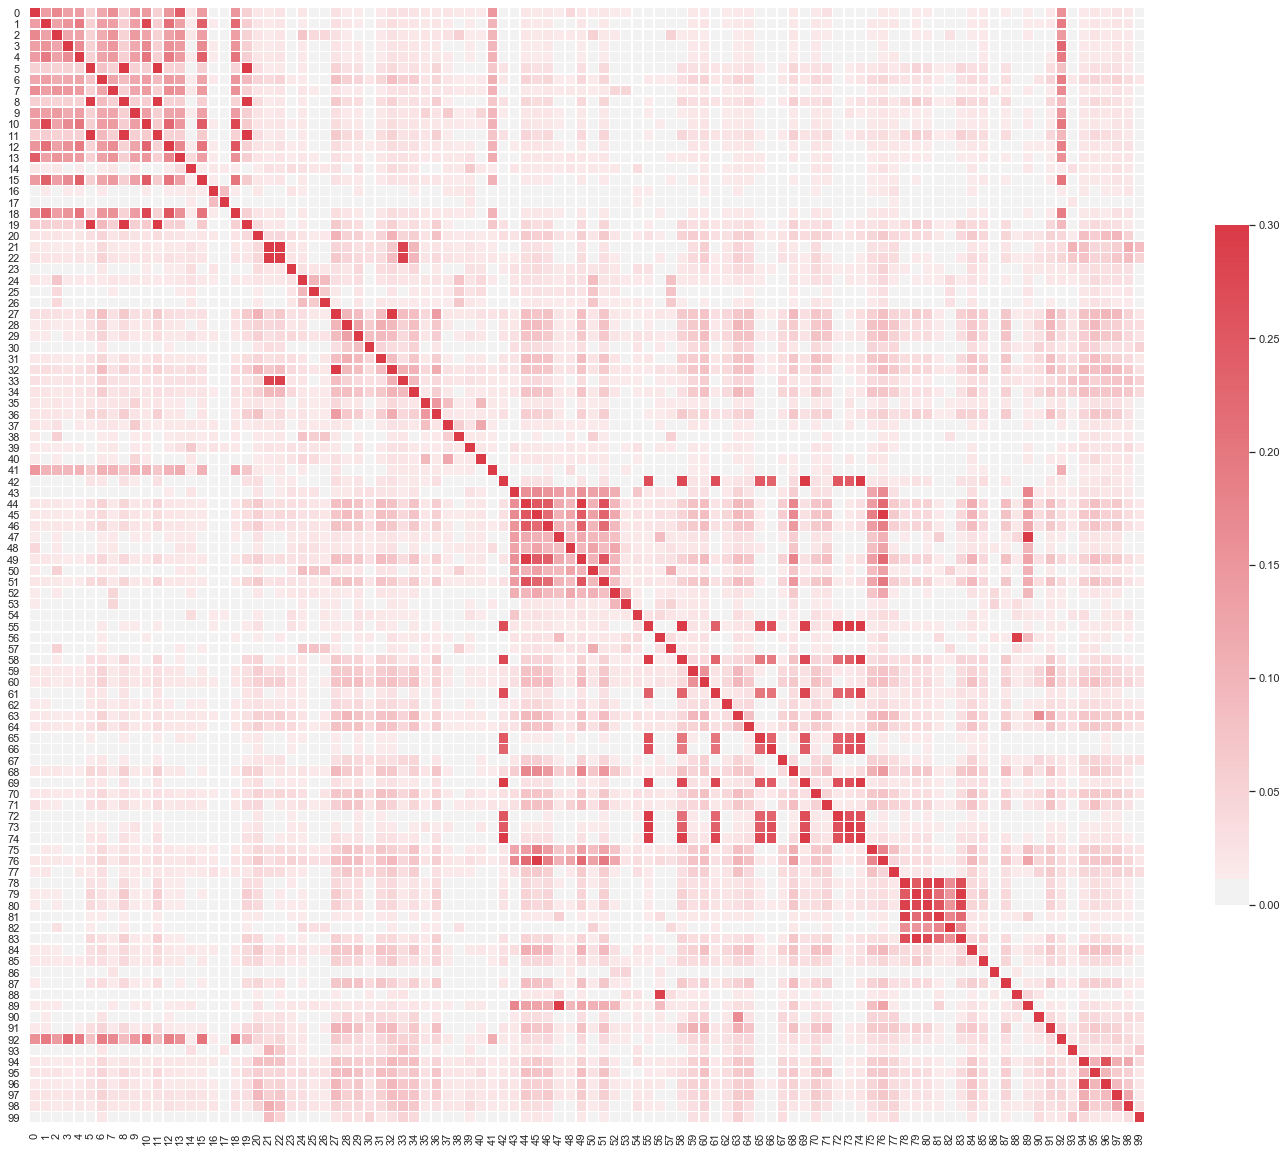

In [142]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr = jaccard_scores

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=0.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#mask=mask,
#vmax = 1.0 or 0.3 or any value depending on the se

### (b) Signature Similarity

In [153]:
final_corp_ss = doc_jsim

In [155]:
len(final_corp_ss)

100

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
binary_corp_ss = cv.fit_transform(final_corp_ss).toarray()

In [157]:
#print(binary_corp_ss.shape)
#print(type(binary_corp_ss))
binary_corp_ss
#binary_corp_ss = documents x terms

array([[4, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [158]:
dict_index = (cv.vocabulary_)

In [159]:
for x7 in dict_index:
    if(dict_index[x7]==0):
        print(x7)

00


In [160]:
for x8 in range(0,len(binary_corp_ss)):
    for x9 in range(0,len(binary_corp_ss[0])):
        if(binary_corp_ss[x8][x9]!=0):
            binary_corp_ss[x8][x9]=1

In [161]:
binary_corp_ss

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [162]:
bin_term_doc = binary_corp_ss.transpose()

In [163]:
#transpose matrix.
bin_term_doc.shape
len(bin_term_doc[0])

100

In [164]:
perm = np.zeros((len(bin_term_doc),20))
perm.shape

(38377, 20)

In [165]:
import random
random_gen = []
for x10 in range(0,20):
    ran = random.sample(range(0, len(bin_term_doc)),len(bin_term_doc))
    for x11 in range(0,len(bin_term_doc)):
        perm[x11][x10]=ran[x11]

In [166]:
sign_mat = np.zeros((20,100))

In [167]:
# here number of permutations is 20
for x12 in range(0,20):
    count=0
    for x13 in range(0,len(bin_term_doc)):
        for x14 in range(0,len(bin_term_doc)):
            if(perm[x14][x12]==x13):  
                for x15 in range(0,len(bin_term_doc[0])):
                    if(bin_term_doc[x14][x15]==1):
                        sign_mat[x12][x15]=x14
                        count+=1
                break
        if(count==100):
            break

In [169]:
len(bin_term_doc)

38377

In [148]:
#sign_mat = signature matrix used in computing jaccard scores later

In [170]:
jac_sign_scores = np.zeros((100,100))
for x16 in range(0,100):
    for x17 in range(0,100):
        isect=0
        for x18 in range(0,20):
            if(sign_mat[x18][x16]==sign_mat[x18][x17]):
                isect = isect+1
        jac_sign_scores[x16][x17]=(isect/20)

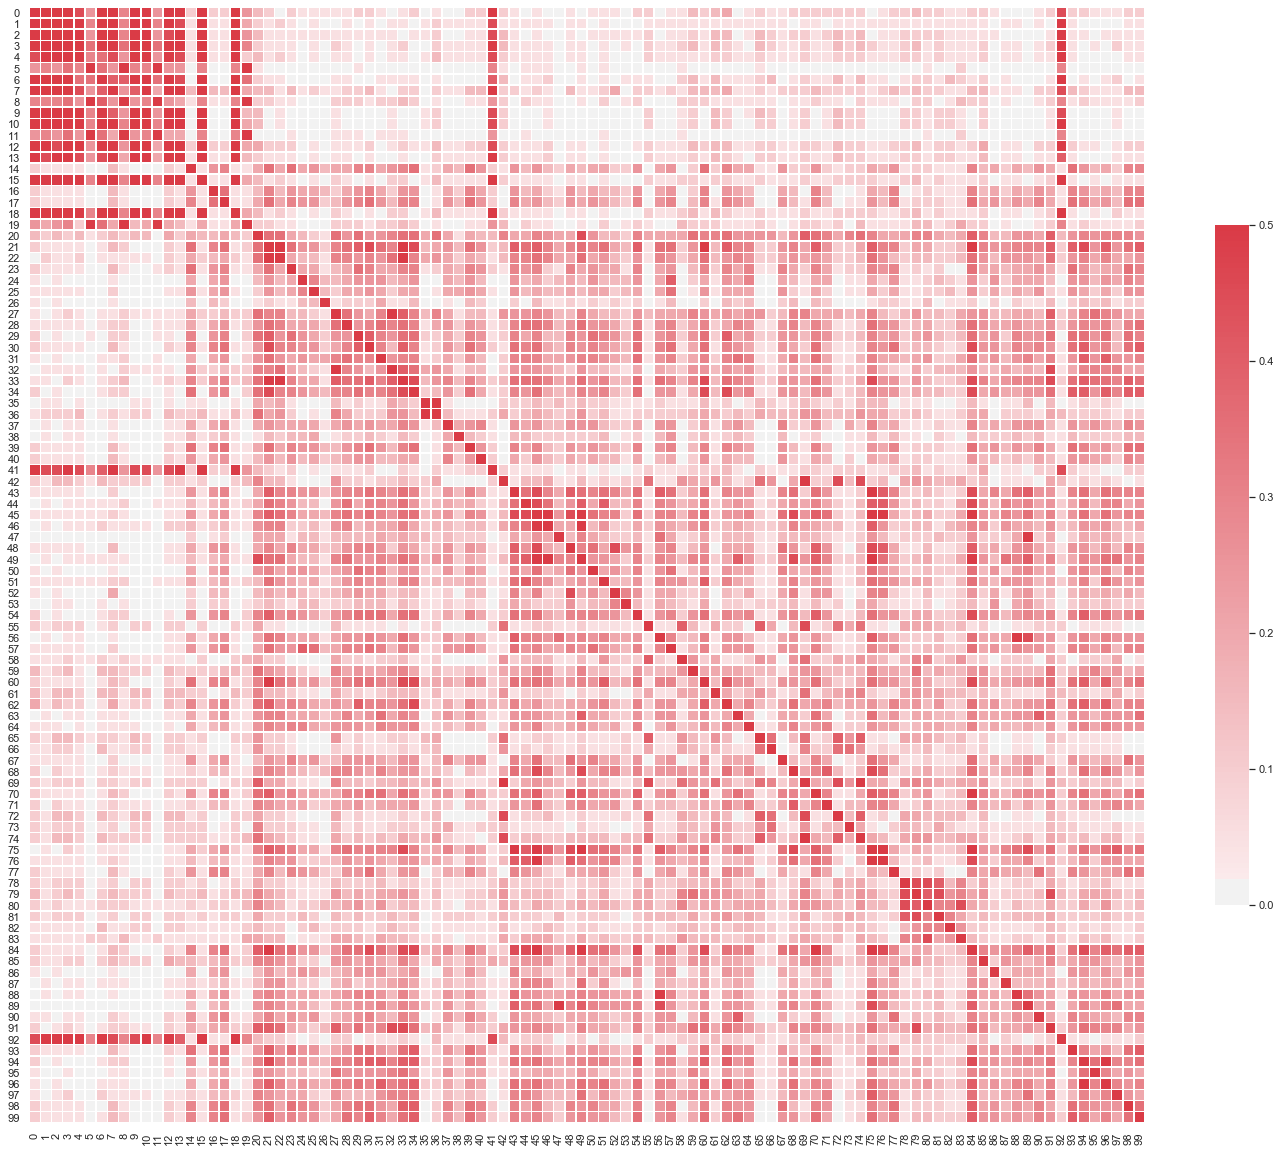

In [171]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
corr_jac = jac_sign_scores

#mask = np.zeros_like(corr_jac, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_jac, cmap=cmap, vmax=0.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#mask=mask,
#vmax = 1.0 or 0.3

# TASK 3

## a) Page Rank based on incoming edges

In [405]:
incoming_edges_value=graph.in_degree
incoming_edges_value_dict={}
for i in incoming_edges_value:
    incoming_edges_value_dict[i[0]]=i[1]
incoming_edges_value_sorted_dict=sorted(incoming_edges_value_dict.items(), key = lambda kv:(kv[1], kv[0]),reverse=True)
print(incoming_edges_value_dict)

{1: 0, 6: 1, 7: 1, 8: 1, 9: 1, 2: 0, 10: 1, 13: 1, 17: 4, 18: 2, 19: 2, 3: 0, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 9, 26: 1, 4: 0, 27: 3, 28: 3, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 5: 0, 38: 2, 39: 2, 40: 2, 42: 2, 43: 2, 44: 3, 45: 3, 46: 1, 41: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 65: 1, 66: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 10, 76: 9, 77: 1, 78: 1, 79: 1, 82: 7, 83: 6, 84: 6, 88: 1, 89: 1, 97: 1, 103: 4, 111: 3, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 126: 1, 127: 1, 128: 1, 129: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 151: 1, 160: 1, 162: 1, 163: 1, 164: 1, 166: 1, 168: 3, 169: 3, 171: 3, 172: 3, 173: 3, 174: 3, 195: 1, 196: 1, 197: 1, 198: 1, 199: 1, 200: 1, 201: 1, 202: 2, 203: 1, 204: 1, 205: 1, 206: 1, 207: 1, 208: 1, 209: 1, 210: 2, 211: 1, 212: 1, 213: 1, 214: 1, 215: 1, 216: 1, 217: 1, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 1, 22

In [ ]:
for i in range(0,len(incoming_edges_value_dict)):
    print("page rank of page",urls_list[url_map2[sorted_pr1[z4][0]]],"is",sorted_pr1[z4][1])

## b) Page Rank Iterative Page Rank Method

In [406]:
nodes=graph.nodes()
number_of_nodes=graph.number_of_nodes()

In [407]:
edges=graph.edges

In [408]:
outcoming_edges_value=graph.out_degree
outcoming_edges_value_dict={}
for i in outcoming_edges_value:
    outcoming_edges_value_dict[i[0]]=i[1]

In [409]:
print(nodes)
print(outcoming_edges_value_dict)
print(incoming_edges_value_dict)

[1, 6, 7, 8, 9, 2, 10, 13, 17, 18, 19, 3, 20, 21, 22, 23, 24, 25, 26, 4, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 5, 38, 39, 40, 42, 43, 44, 45, 46, 41, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 82, 83, 84, 88, 89, 97, 103, 111, 115, 116, 117, 118, 119, 120, 126, 127, 128, 129, 142, 143, 144, 145, 146, 147, 148, 151, 160, 162, 163, 164, 166, 168, 169, 171, 172, 173, 174, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 237, 238, 239, 240, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 260, 261, 262, 263, 264, 265, 289, 290, 292, 293, 294, 295, 296, 297, 298, 300, 306, 307, 308]
{1: 4, 6: 8, 7: 8, 8: 7, 9: 6, 2: 5, 10: 6, 13: 0, 17: 9, 18: 8, 19: 8, 3: 10, 20: 9, 21: 9, 22: 8, 23: 9, 24: 7, 25: 8, 26: 8, 4: 10, 27: 7, 28: 7, 29: 8, 30

In [410]:
page_rank_nodes_2={}
for i in nodes:
    page_rank_nodes_2[i]=1/number_of_nodes

In [411]:
for i in range(3):
    for i in nodes:
        if incoming_edges_value_dict[i]==0:
            page_rank_nodes_2[i]=0
        else:
            sum_=0
            for j in edges:
                if i==j[1]:
                    sum_=sum_+outcoming_edges_value_dict[j[0]]
            if sum_!=0:
                page_rank_nodes_2[i]/=sum_

In [412]:
print(page_rank_nodes_2)

{1: 0, 6: 8.445945945945946e-05, 7: 8.445945945945946e-05, 8: 8.445945945945946e-05, 9: 8.445945945945946e-05, 2: 0, 10: 4.324324324324324e-05, 13: 4.324324324324324e-05, 17: 1.5041337355386943e-07, 18: 1.6016016016016016e-06, 19: 1.6016016016016016e-06, 3: 0, 20: 5.405405405405405e-06, 21: 5.405405405405405e-06, 22: 5.405405405405405e-06, 23: 5.405405405405405e-06, 24: 5.405405405405405e-06, 25: 1.1390543934922633e-08, 26: 5.405405405405405e-06, 4: 0, 27: 3.4594594594594597e-07, 28: 3.4594594594594597e-07, 29: 5.405405405405405e-06, 30: 5.405405405405405e-06, 31: 5.405405405405405e-06, 32: 5.405405405405405e-06, 33: 5.405405405405405e-06, 34: 5.405405405405405e-06, 35: 5.405405405405405e-06, 36: 5.405405405405405e-06, 5: 0, 38: 1.3196790540540541e-06, 39: 1.3196790540540541e-06, 40: 1.3196790540540541e-06, 42: 1.3196790540540541e-06, 43: 1.3196790540540541e-06, 44: 3.91016016016016e-07, 45: 3.91016016016016e-07, 46: 1.0557432432432433e-05, 41: 1.0557432432432433e-05, 48: 1.05574324324

## c)Page Rank Iterative Method with Nodes Removed

In [413]:
nodes_with_out=[]
for i in nodes:
    if outcoming_edges_value_dict[i]!=0:
        nodes_with_out.append(i)
number_of_nodes_out=len(nodes_with_out)
print(number_of_nodes_out)
page_rank_nodes_3={}
for i in nodes:
    page_rank_nodes_3[i]=1/number_of_nodes
for i in range(3):
    for i in nodes_with_out:
        if incoming_edges_value_dict[i]==0:
            page_rank_nodes_3[i]=0
        else:
            sum_=0
            for j in edges:
                if i==j[1]:
                    sum_=sum_+outcoming_edges_value_dict[j[0]]
            if sum_!=0:
                page_rank_nodes_3[i]/=sum_

38


In [414]:
print(page_rank_nodes_3)

{1: 0, 6: 8.445945945945946e-05, 7: 8.445945945945946e-05, 8: 8.445945945945946e-05, 9: 8.445945945945946e-05, 2: 0, 10: 4.324324324324324e-05, 13: 0.005405405405405406, 17: 1.5041337355386943e-07, 18: 1.6016016016016016e-06, 19: 1.6016016016016016e-06, 3: 0, 20: 5.405405405405405e-06, 21: 5.405405405405405e-06, 22: 5.405405405405405e-06, 23: 5.405405405405405e-06, 24: 5.405405405405405e-06, 25: 1.1390543934922633e-08, 26: 5.405405405405405e-06, 4: 0, 27: 3.4594594594594597e-07, 28: 3.4594594594594597e-07, 29: 5.405405405405405e-06, 30: 5.405405405405405e-06, 31: 5.405405405405405e-06, 32: 5.405405405405405e-06, 33: 5.405405405405405e-06, 34: 5.405405405405405e-06, 35: 5.405405405405405e-06, 36: 5.405405405405405e-06, 5: 0, 38: 1.3196790540540541e-06, 39: 1.3196790540540541e-06, 40: 1.3196790540540541e-06, 42: 1.3196790540540541e-06, 43: 1.3196790540540541e-06, 44: 3.91016016016016e-07, 45: 3.91016016016016e-07, 46: 1.0557432432432433e-05, 41: 0.005405405405405406, 48: 0.00540540540540

## d) Line Graph Comparison

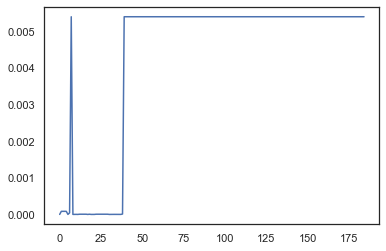

In [415]:
lists = sorted(page_rank_nodes_3.items()) # sorted by key, return a list of tuples
x,y = zip(*lists)# unpack a list of pairs into two tuples
x_=[]
y_=[]
for i in range(len(nodes)):
    x_.append(i)
for v in page_rank_nodes_3.values():
    y_.append(v)
plt.plot(x_,y_)
plt.show()

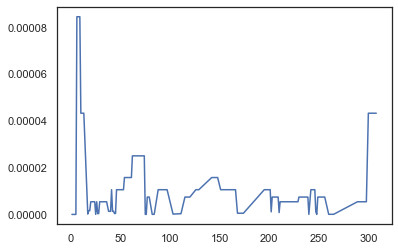

In [416]:
import matplotlib.pylab as plt
lists = sorted(page_rank_nodes_2.items()) # sorted by key, return a list of tuples
x,y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x,y)
plt.show()

## e) Matrix Multiplication Method

In [321]:
urls_list[1]="https://en.wikipedia.org/wiki/Link_analysis"
urls_list[2]="https://www.python.org/"
urls_list[3]="https://www.youtube.com/"
urls_list[4]="https://wiki.python.org/moin/IntegratedDevelopmentEnvironments/"
urls_list[5]="https://www.stackoverflow.com/"
urls_keys=[]
for k,v in urls_list.items():
    urls_keys.append(k)
    
url_map={}
for z0 in range(0,len(urls_list)):
    url_map[urls_keys[z0]]=z0
        
url_map2={}
for z5 in range(0,len(urls_list)):
    url_map2[z5]=urls_keys[z5]

In [464]:
import numpy as np
mrank = np.zeros((len(url_map),len(url_map)))
m1d = np.ones((len(url_map),1)) / len(url_map)


for z1 in range(0,len(url_map)):
    m1=0
    m2=[]
    
    m1=graph.out_degree(final_l[z1][0])
    m2=list(graph.out_edges(final_l[z1][0]))
    
    for z2 in range(0,m1):
        mrank [ url_map[ m2[z2][0] ] ] [url_map[ m2[z2][1] ]] = (1/m1)


mrank1 = np.zeros((len(url_map),len(url_map)))
mrank2 = np.zeros((len(url_map),len(url_map)))
pr1 = np.zeros((len(url_map),1))

mrank1 = np.matmul(mrank,mrank)
mrank2 = np.matmul(mrank1,mrank)
pr1 = np.matmul((mrank*mrank*mrank),m1d)

In [465]:
pr1_dict={}
for z3 in range(0,len(pr1)):
    pr1_dict[z3]=float(pr1[z3])

In [466]:
import operator
sorted_pr1= sorted(pr1_dict.items(), key=operator.itemgetter(1),reverse=True)

In [467]:
for z4 in range(0,len(pr1)):
    print("page rank of page",urls_list[url_map2[sorted_pr1[z4][0]]],"is",sorted_pr1[z4][1])

page rank of page https://en.wikipedia.org/wiki/Link_analysis is 0.00033783783783783786
page rank of page https://www.python.org/ is 0.0002162162162162163
page rank of page https://en.wikipedia.org/wiki/Medical_research is 0.00015015015015015017
page rank of page https://www.python.org/psf/donations/ is 0.00015015015015015017
page rank of page https://en.wikipedia.org/wiki/Market_research is 0.00011031439602868172
page rank of page https://accounts.google.com/ServiceLogin?passive=true&hl=en&uilel=3&continue=https%3A%2F%2Fwww.youtube.com%2Fsignin%3Fnext%3D%252F%26hl%3Den%26feature%3Dsign_in_promo%26app%3Ddesktop%26action_handle_signin%3Dtrue&service=youtube is 0.00011031439602868172
page rank of page https://wiki.python.org/moin/IntegratedDevelopmentEnvironments?action=info is 0.00011031439602868172
page rank of page https://wiki.python.org/moin/IntegratedDevelopmentEnvironments?action=AttachFile is 0.00011031439602868172
page rank of page https://en.wikipedia.org/wiki/Computer_security

## f) Matrix Method for Remaining Network

In [478]:
out_list=graph.out_degree

In [479]:
out_dict={}
for i in out_list:
    if(i[1]!=0):
        out_dict[i[0]]=i[1]
print(out_dict)

urls_keys_out=[]
for k,v in out_dict.items():
    urls_keys_out.append(k)

{1: 4, 6: 8, 7: 8, 8: 7, 9: 6, 2: 5, 10: 6, 17: 9, 18: 8, 19: 8, 3: 10, 20: 9, 21: 9, 22: 8, 23: 9, 24: 7, 25: 8, 26: 8, 4: 10, 27: 7, 28: 7, 29: 8, 30: 8, 31: 9, 32: 10, 33: 10, 34: 9, 35: 8, 36: 9, 5: 8, 38: 8, 39: 8, 40: 8, 42: 8, 43: 10, 44: 5, 45: 8, 46: 8}


In [480]:
url_map_n={}
for z0 in range(0,len(out_dict)):
    url_map_n[urls_keys_out[z0]]=z0
        
url_map_n2={}
for z5 in range(0,len(out_dict)):
    url_map_n2[z5]=urls_keys_out[z5]

In [527]:
import numpy as np
mrank_n = np.zeros((len(out_dict),len(out_dict)))
m1d_n = np.ones((len(out_dict),1)) / len(out_dict)


for z1_n in range(0,len(out_dict)):
    m1_n=0
    m2_n=[]
    
    m1_n=graph.out_degree(out_dict[url_map_n2[z1_n]])
    m2_n=list(graph.out_edges(out_dict[url_map_n2[z1_n]]))
    #print(z1_n)
    for z2_n in range(0,m1_n):
        #print(z2_n)
        #print(m2_n[z2_n][0])
        #print(url_map_n[ m2_n[z2_n][0] ])
        #print(m2_n[z2_n][1])
        #print(url_map_n[ m2_n[z2_n][1] ])
        #print('***')
        try:
            mrank_n[ url_map_n[ m2_n[z2_n][0] ] ] [url_map_n[ m2_n[z2_n][1] ]] = (1/m1_n)
        except:
            pass
    #print(z1_n)

mrank1_n = np.zeros((len(out_dict),len(out_dict)))
mrank2_n = np.zeros((len(out_dict),len(out_dict)))
pr1_n = np.zeros((len(out_dict),1))
pr1_n = np.matmul((mrank_n*mrank_n*mrank_n),m1d_n)

In [528]:
pr1_n
pr1_n_dict={}
for z3 in range(0,len(pr1_n)):
    pr1_n_dict[z3]=float(pr1_n[z3])

In [483]:
import operator
sorted_pr1_n= sorted(pr1_n_dict.items(), key=operator.itemgetter(1),reverse=True)

In [484]:
for z4 in range(0,len(pr1_n)):
    try:
        print("page rank of page",urls_list[url_map_n2[sorted_pr1_n[z4][0]]],"is",sorted_pr1_n[z4][1])
    except:
        pass

page rank of page https://www.stackoverflow.com/ is 0.00041118421052631577
page rank of page https://en.wikipedia.org/wiki/Computer_security is 0.0003597861842105263
page rank of page https://wiki.python.org/moin/IntegratedDevelopmentEnvironments/ is 0.00026315789473684215
page rank of page https://en.wikipedia.org/wiki/Search_engine_optimization is 0.00010279605263157894
page rank of page https://en.wikipedia.org/wiki/Link_analysis is 0.0
page rank of page https://en.wikipedia.org/wiki/Market_research is 0.0
page rank of page https://en.wikipedia.org/wiki/Medical_research is 0.0
page rank of page https://www.python.org/ is 0.0
page rank of page https://www.python.org/psf/donations/ is 0.0
page rank of page https://www.youtube.com/channel/UClgRkhTL3_hImCAmdLfDE4g is 0.0
page rank of page https://www.youtube.com/channel/UCYfdidRxbB8Qhf0Nx7ioOYw is 0.0
page rank of page https://www.youtube.com/channel/UC4R8DWoMoI7CAwX8_LjQHig is 0.0
page rank of page https://www.youtube.com/ is 0.0
page 

## g) Line Graph Comparison

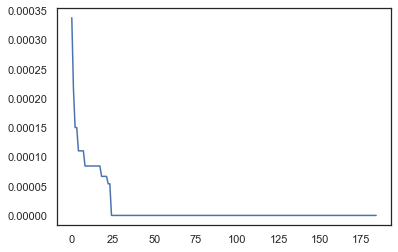

In [524]:
x_m=[]
y_m=[]
for i in range(0,len(sorted_pr1)):
    x_m.append(sorted_pr1[i][1])
    y_m.append(i)
plt.plot(y_m,x_m)
plt.show()

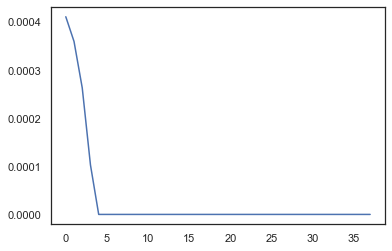

In [525]:
x_m2=[]
y_m2=[]
for i in range(0,len(sorted_pr1_n)):
    x_m2.append(sorted_pr1_n[i][1])
    y_m2.append(i)
plt.plot(y_m2,x_m2)
plt.show()